Sharing formatoptions
=======
This example shows you the capabilities of sharing formatoptions and what it is all about.

Within the psyplot framework you can easily manage multiple plots and even have interaction between them. This is especially useful if want to compare different variables.

This example requires the file ```'sharing_demo.nc'``` which contains one variable for the temperature and the [psy-maps](http://psyplot.readthedocs.io/projects/psy-maps/en/latest/) plugin.

In [1]:
import psyplot.project as psy
%matplotlib inline
%config InlineBackend.close_figures = False
fname = 'sharing_demo.nc'

First we create 4 plots into one figure, one for each time step

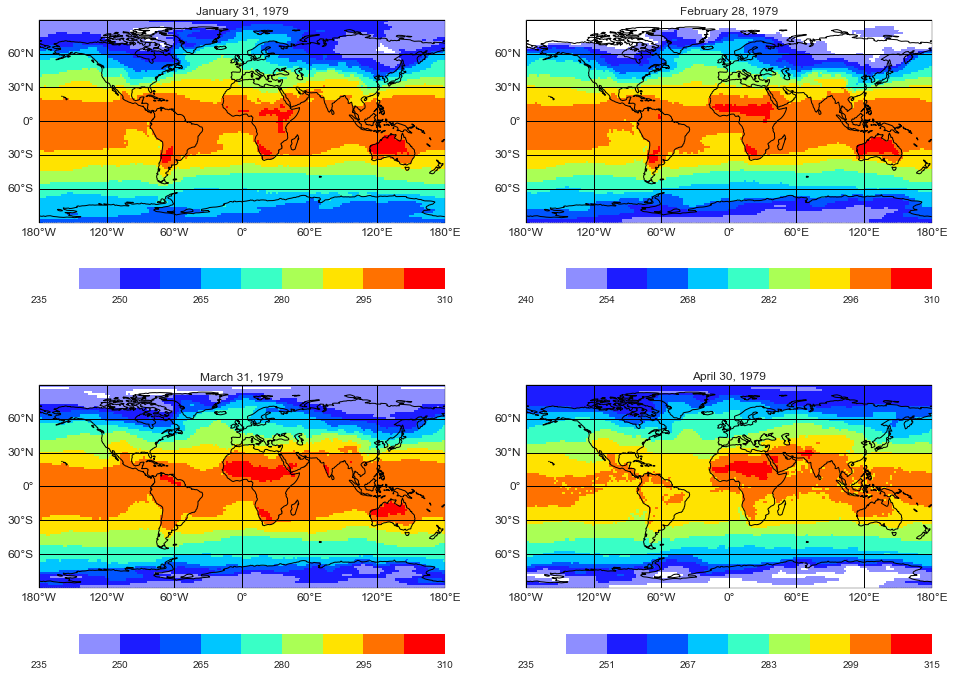

In [2]:
maps = psy.plot.mapplot(fname, name='t2m', title='{dinfo}', ax=(2, 2), time=range(4))

As you see, they have slightly different boundaries which can be very annoying if we want to compare them. Therefore we can share the boundaries of the colorbar. The corresponding formatoption is the *bounds* formatoption

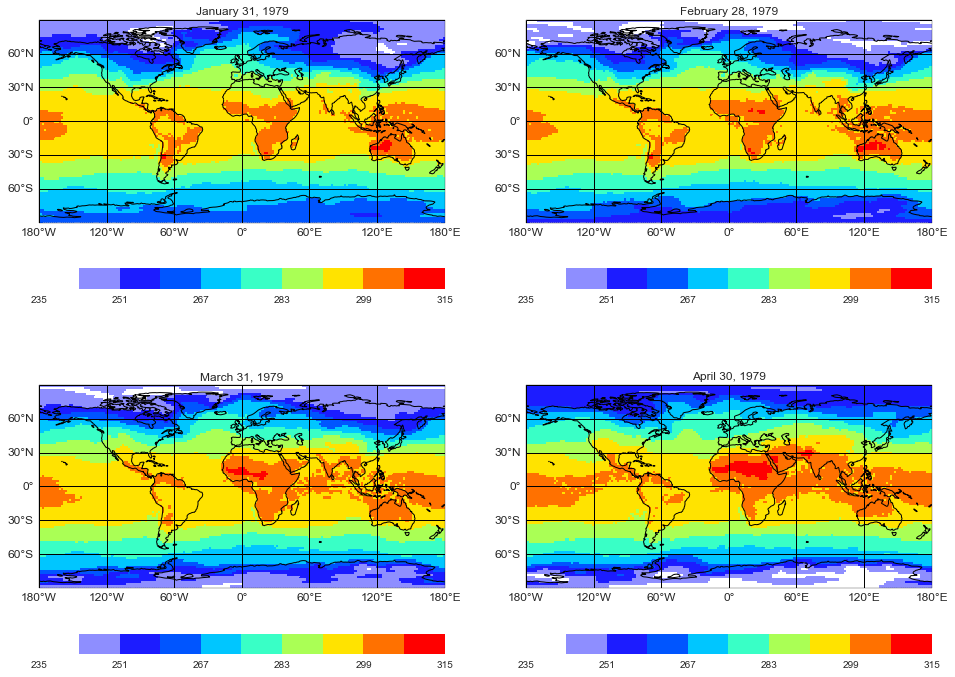

In [3]:
maps.share(keys='bounds')
maps.show()

Now the very first array (January 31st) shares the boundaries with all the other. Furthermore it uses their data as well to calculate the range. 


The sharing of formatoptions works for every formatoption key and formatoption groups.

In [4]:
maps[0].psy.plotter.groups

{'axes': 'Axes formatoptions',
 'colors': 'Color coding formatoptions',
 'labels': 'Label formatoptions',
 'masking': 'Masking formatoptions',
 'misc': 'Miscallaneous formatoptions',
 'plot': 'Plot formatoptions',
 'ticks': 'Axis tick formatoptions'}

Suppose for example, we want to work with only the last array but have the color settings kept equal throughout each plot. For this we can share the ```'colors'``` group of the formatoption. To do this, we should first unshare the
formatoptions currently the first one shares the boundaries with the others. 

In [5]:
maps.unshare(keys='bounds')
# Now we share the color settings of the last one
arr = maps[-1]
maps[:-1].share(arr, keys='colors')

If we now update any of the color formatoptions of the last array, we update them for all the others. However, the other formatoptions (in this example the *projection*) keep untouched

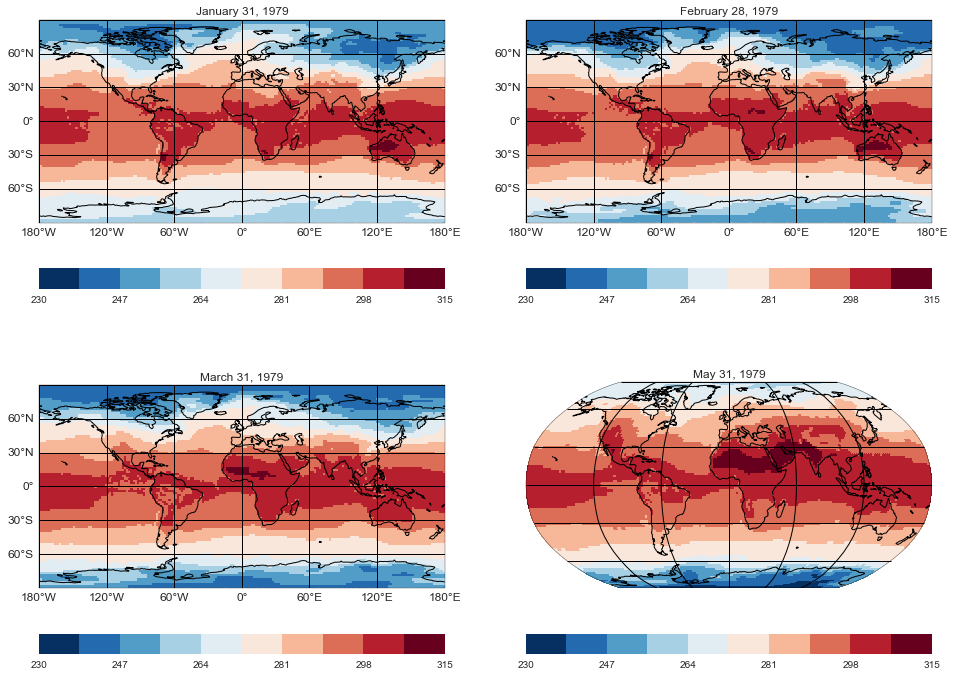

In [6]:
arr.psy.update(cmap='RdBu_r', projection='robin', time=4)
maps.show()

In [7]:
psy.close('all')